In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [2]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.drop(['isFlaggedFraud'], axis=1,inplace=True)

In [4]:
df.shape

(6362620, 10)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   

                oldbalanceDest  newbalanceDest   isFraud  
step                  0.027665        0.025888  0.031578  
amount                0.294137        0.459304  0.076688  
oldbalanceOrg         0.066243        0.042029  0.010154  
newbalanceOrig        0.067812        0.041837 -0.008148  
oldbalanceDest        1.000000        0.976569 -0.005885  
newbalanceDest        0.976569        1.000000  0.000535  
isFraud              -0.005885    

DATA VISUALIZATION

UNVARIATE ANALYSIS

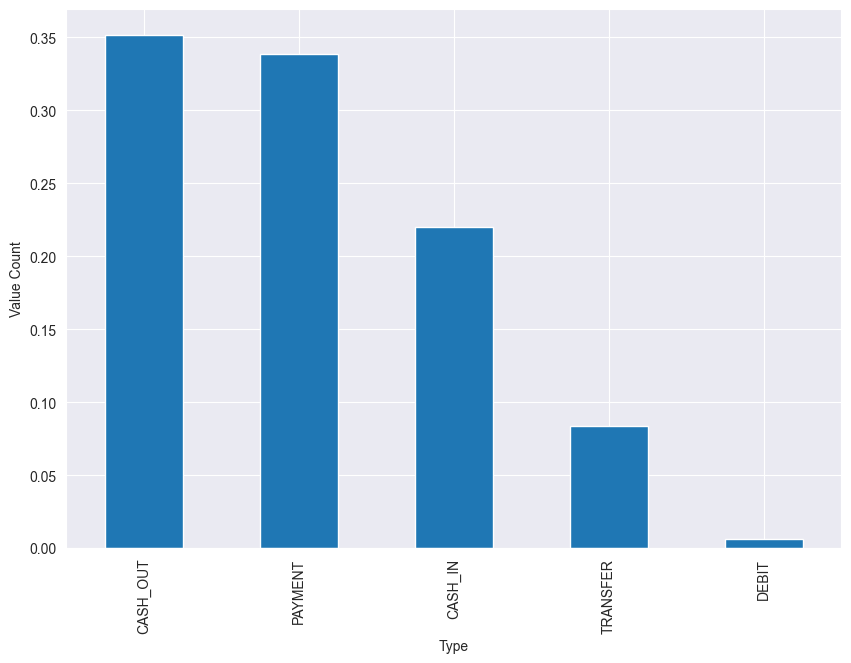

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
df['type'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Type")
plt.ylabel("Value Count")
plt.show()

<Axes: >

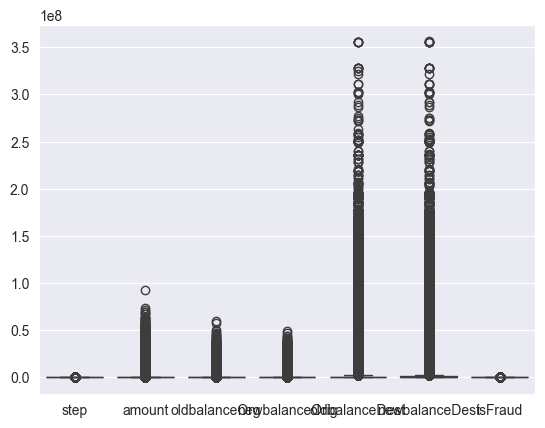

In [11]:
sns.boxplot(df)

<Axes: xlabel='type', ylabel='count'>

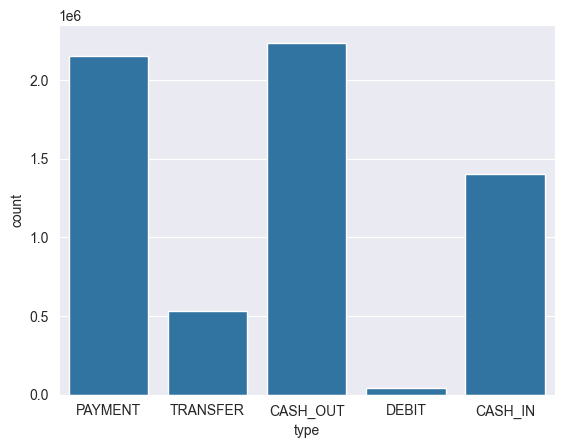

In [12]:
sns.countplot(data=df,x="type")

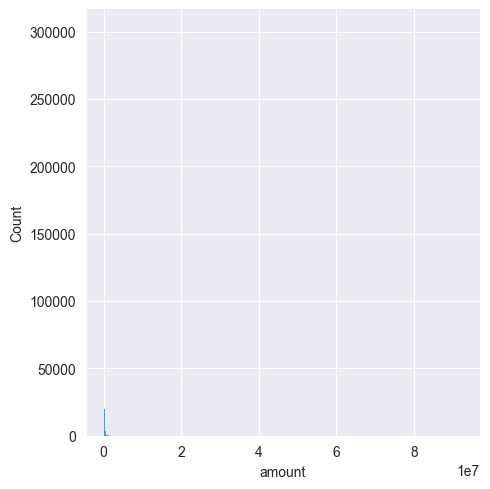

In [13]:
sns.displot(df.amount)

<Axes: xlabel='isFraud', ylabel='count'>

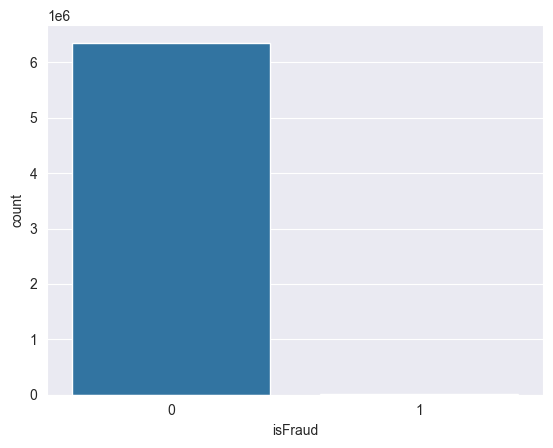

In [14]:
sns.countplot(data=df,x="isFraud")

In [15]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
# Convert the 'isFraud' column to string type
df['isFraud'] = df['isFraud'].astype(str)

# Assign the value 'is not Fraud' to rows where 'isFraud' is 0
df.loc[df["isFraud"] == "0", "isFraud"] = "is not Fraud"

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,is not Fraud


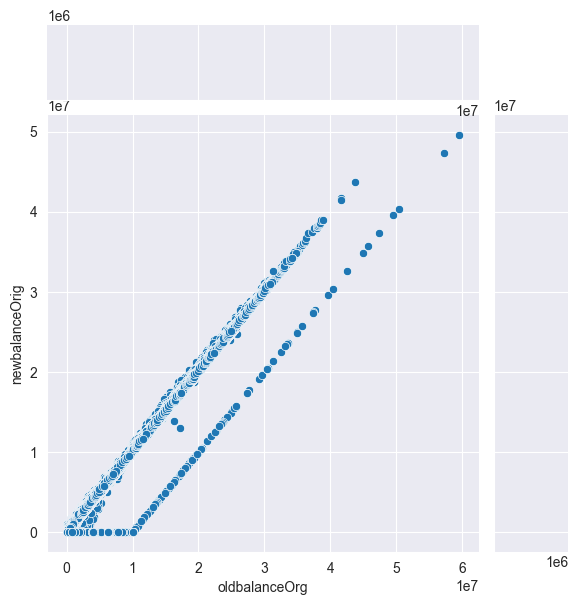

In [18]:
sns.jointplot(x='oldbalanceOrg', y='newbalanceOrig', data=df)

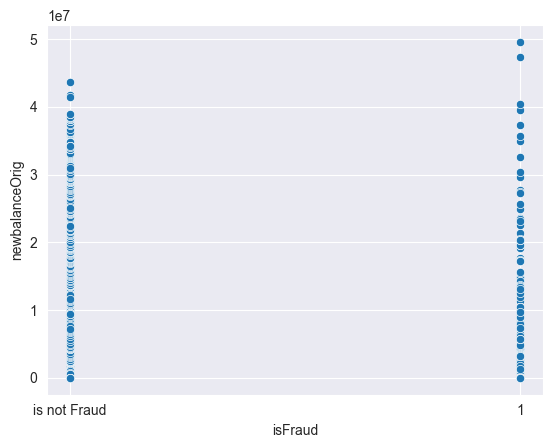

In [19]:
# Convert the 'isFraud' column to string type
df['isFraud'] = df['isFraud'].astype(str)

# Plot the scatterplot
sns.scatterplot(x=df.isFraud, y=df.newbalanceOrig)
plt.show()

<Axes: xlabel='amount', ylabel='oldbalanceOrg'>

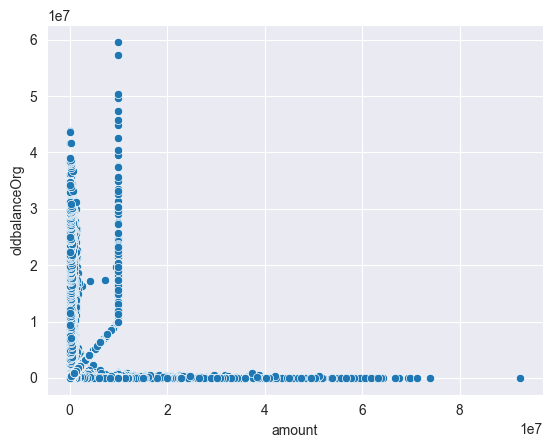

In [20]:
sns.scatterplot(x=df.amount,y=df.oldbalanceOrg)

MULTIVARIATE ANALYSIS

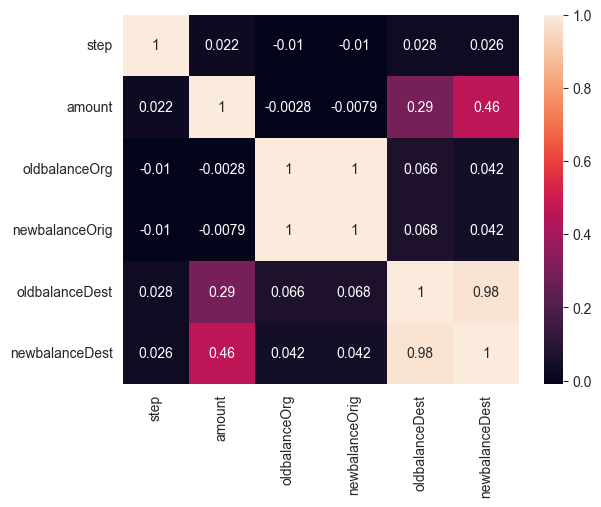

In [21]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

DATA PREPROCESSING

In [22]:
df.shape

(6362620, 10)

In [23]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [24]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


REMOVAL OF OUTLIERS

<Axes: >

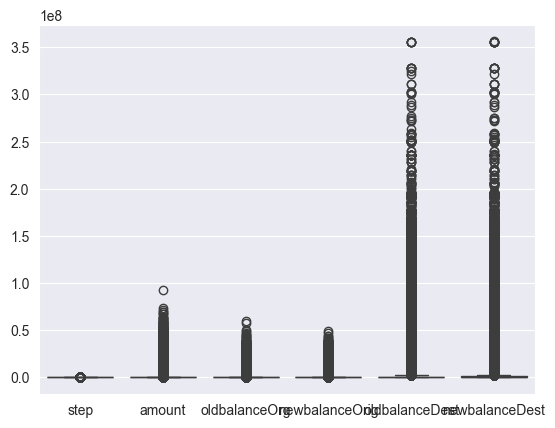

In [25]:
sns.boxplot(df)

REMOVAL OF OUTLIERS BY TRANSFORMATION METHOD

In [26]:
num=[var for var in df.columns if df[var].dtype!='O' and var!='isFraud']
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [27]:
from scipy import stats
for x in num:
  bmi_z_score=stats.zscore(df[x])
  df=df[np.abs(bmi_z_score)<=3]

<Axes: >

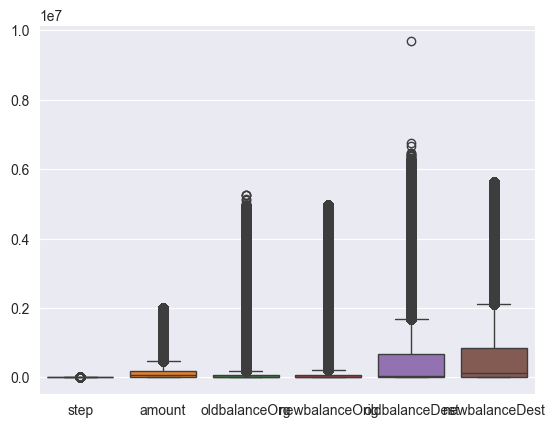

In [28]:
sns.boxplot(df)

LABEL ENCODING

In [29]:
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])

In [30]:
df["type"].value_counts()

type
3    2129181
1    2077111
0     950994
4     428622
2      38466
Name: count, dtype: int64

In [31]:
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [32]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


In [33]:
y.head()

0    is not Fraud
1    is not Fraud
2               1
3               1
4    is not Fraud
Name: isFraud, dtype: object

TRAIN TEST SPLIT

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

MODEL BUILDING

RANDOM FOREST CLASSIFIER

In [38]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, max_features='sqrt', random_state=0)

# Fit the model
rfc.fit(x_train, y_train)

# Predict on the test set
y_test_predict1 = rfc.predict(x_test)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, y_test_predict1)
test_accuracy

0.9996292921435715

In [39]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, max_features='sqrt', random_state=0)

# Fit the model
rfc.fit(x_train, y_train)

# Predict on the training set
y_train_predict1 = rfc.predict(x_train)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_predict1)
train_accuracy

0.9996619623651433

In [40]:
pd.crosstab(y_test,y_test_predict1)

col_0,1,is not Fraud
isFraud,,
1,742,403
is not Fraud,14,1123716


In [41]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

           1       0.98      0.65      0.78      1145
is not Fraud       1.00      1.00      1.00   1123730

    accuracy                           1.00   1124875
   macro avg       0.99      0.82      0.89   1124875
weighted avg       1.00      1.00      1.00   1124875



DECISION TREE CLASSIFIER

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the DecisionTreeClassifier with optimized parameters
dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=0)

# Fit the model
dtc.fit(x_train, y_train)

# Predict on the test set
y_test_predict2 = dtc.predict(x_test)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, y_test_predict2)
test_accuracy

0.9996275141682409

In [43]:
dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=0)

# Fit the model
dtc.fit(x_train, y_train)

# Predict on the training set
y_train_predict2 = dtc.predict(x_train)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_predict2)
train_accuracy

0.9996697410089435

In [44]:
pd.crosstab(y_test,y_test_predict2)

col_0,1,is not Fraud
isFraud,,
1,759,386
is not Fraud,33,1123697


In [45]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

           1       0.96      0.66      0.78      1145
is not Fraud       1.00      1.00      1.00   1123730

    accuracy                           1.00   1124875
   macro avg       0.98      0.83      0.89   1124875
weighted avg       1.00      1.00      1.00   1124875



SUPPORT VECTOR MACHINE CLASSIFIER

In [46]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Initialize the LinearSVC with optimized parameters
svc = LinearSVC(C=1, random_state=0, max_iter=100)

# Fit the model
svc.fit(x_train, y_train)

# Predict on the test set
y_test_predict4 = svc.predict(x_test)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy

0.9992274697188577

In [47]:
svc = LinearSVC(C=1, random_state=0,max_iter=100)

# Fit the model
svc.fit(x_train, y_train)

# Predict on the training set
y_train_predict4 = svc.predict(x_train)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_predict4)
train_accuracy

0.999218135174605

In [48]:
pd.crosstab(y_test,y_test_predict4)

col_0,1,is not Fraud
isFraud,,
1,326,819
is not Fraud,50,1123680


In [49]:
print(classification_report(y_test, y_test_predict4))

              precision    recall  f1-score   support

           1       0.87      0.28      0.43      1145
is not Fraud       1.00      1.00      1.00   1123730

    accuracy                           1.00   1124875
   macro avg       0.93      0.64      0.71   1124875
weighted avg       1.00      1.00      1.00   1124875



In [50]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [51]:
la=LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [52]:
y_test1=la.transform(y_test)

In [53]:
y_test1=la.transform(y_test)

In [54]:
y_train1

array([1, 1, 1, ..., 1, 1, 1], shape=(4499499,))

4 XGBOOST CLASSIFIER

In [55]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBClassifier with optimized parameters
xgb1 = xgb.XGBClassifier(n_estimators=10, max_depth=5, learning_rate=0.1, random_state=0)

# Fit the model
xgb1.fit(x_train, y_train1)

# Predict on the test set
y_test_predict5 = xgb1.predict(x_test)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test1, y_test_predict5)
test_accuracy

0.999552839204356

In [56]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBClassifier with optimized parameters
xgb1 = xgb.XGBClassifier(n_estimators=10, max_depth=5, learning_rate=0.1, random_state=0)

# Fit the model
xgb1.fit(x_train, y_train1)

# Predict on the training set
y_train_predict5 = xgb1.predict(x_train)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train1, y_train_predict5)
train_accuracy

0.9995792864938963

In [57]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,668,477
1,26,1123704


In [58]:
print(classification_report(y_test1, y_test_predict5))

              precision    recall  f1-score   support

           0       0.96      0.58      0.73      1145
           1       1.00      1.00      1.00   1123730

    accuracy                           1.00   1124875
   macro avg       0.98      0.79      0.86   1124875
weighted avg       1.00      1.00      1.00   1124875



SAVING THE MODEL

In [59]:
import pickle
pickle.dump(xgb1,open("model.pkl","wb"))

In [60]:
model=pickle.load(open("model.pkl","rb"))